In [1]:
import numpy as np 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import LambdaCallback



Using TensorFlow backend.


In [2]:
#dummy training set
training_set = np.array(range(700)).reshape((700,1))/700.

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

#correct shapes - batch size = 1 sequence // sequence length = 699 // features = 1
x_train = np.reshape(x_train, (1, len(x_train), 1))
y_train = np.reshape(y_train, (1, len(y_train), 1))

print(x_train.shape, y_train.shape)



(1, 699, 1) (1, 699, 1)


In [7]:
num_units = 2
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'

#batch_size = 1 -- we only have one sequence, and we used batch_input_shape = (1, None, 1)
batch_size = 1
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

#Use only batch_input_shape
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function,  
                   stateful=True,return_sequences=True, batch_input_shape=(1, None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

#important - we need to reset states because we're using a stateful=True model
resetCallback = LambdaCallback(on_epoch_begin=lambda epoch,logs: regressor.reset_states())

# Using the training set to train the model
print(x_train.shape, y_train.shape)
regressor.fit(x_train, y_train, batch_size=batch_size, epochs = num_epochs, callbacks=[resetCallback])
#regressor.save('model.h5')

(1, 699, 1) (1, 699, 1)
Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 1.1681
Epoch 2/100
1/1 [==============================] - 0s 208ms/step - loss: 1.1630
Epoch 3/100
1/1 [==============================] - 0s 204ms/step - loss: 1.1579
Epoch 4/100
1/1 [==============================] - 0s 208ms/step - loss: 1.1528
Epoch 5/100
1/1 [==============================] - 0s 199ms/step - loss: 1.1477
Epoch 6/100
1/1 [==============================] - 0s 199ms/step - loss: 1.1426
Epoch 7/100
1/1 [==============================] - 0s 196ms/step - loss: 1.1376
Epoch 8/100
1/1 [==============================] - 0s 199ms/step - loss: 1.1326
Epoch 9/100
1/1 [==============================] - 0s 198ms/step - loss: 1.1276
Epoch 10/100
1/1 [==============================] - 0s 197ms/step - loss: 1.1226
Epoch 11/100
1/1 [==============================] - 0s 191ms/step - loss: 1.1177
Epoch 12/100
1/1 [==============================] - 0s 191ms/step - loss: 1.1127
Epoch 13/100


In [29]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

TypeError: Sequential model cannot be built: model is empty. Add some layers first.

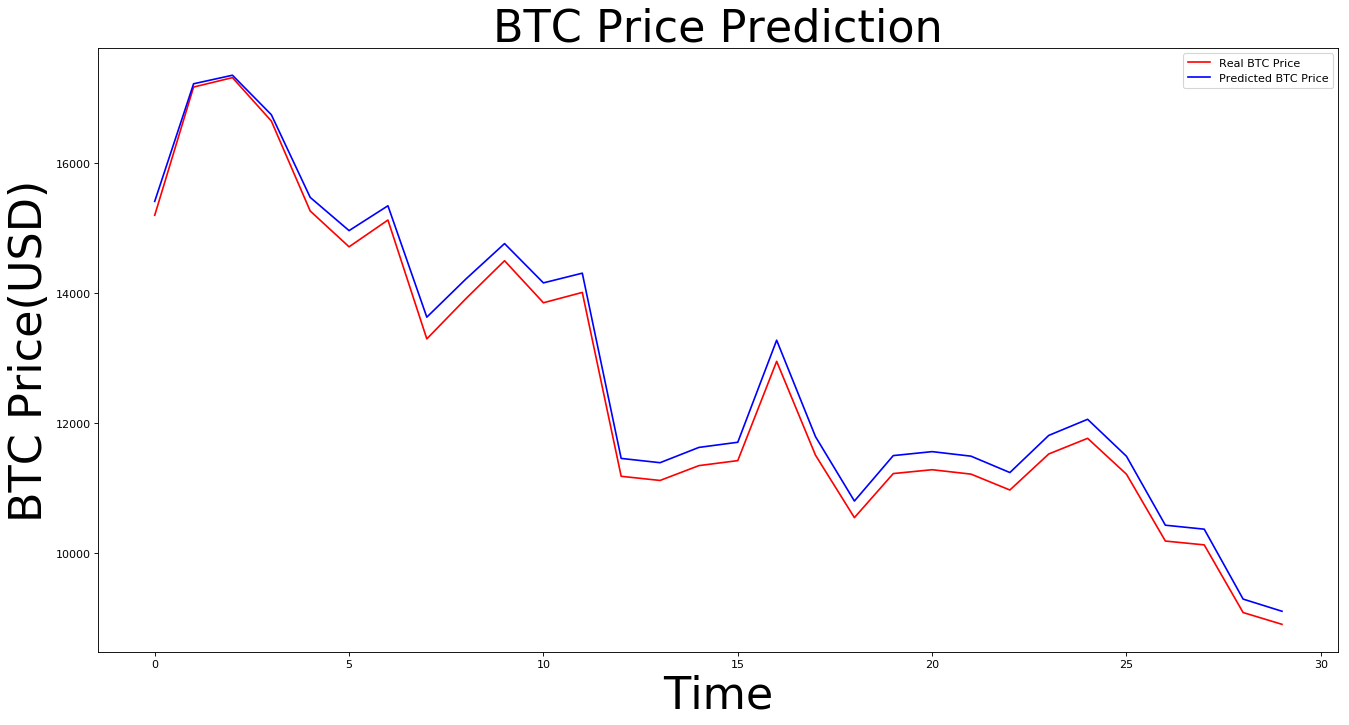

In [7]:
plt.figure(figsize=(20, 10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()